In [5]:
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
import os

In [7]:

data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [11]:

batch = data_iterator.next()


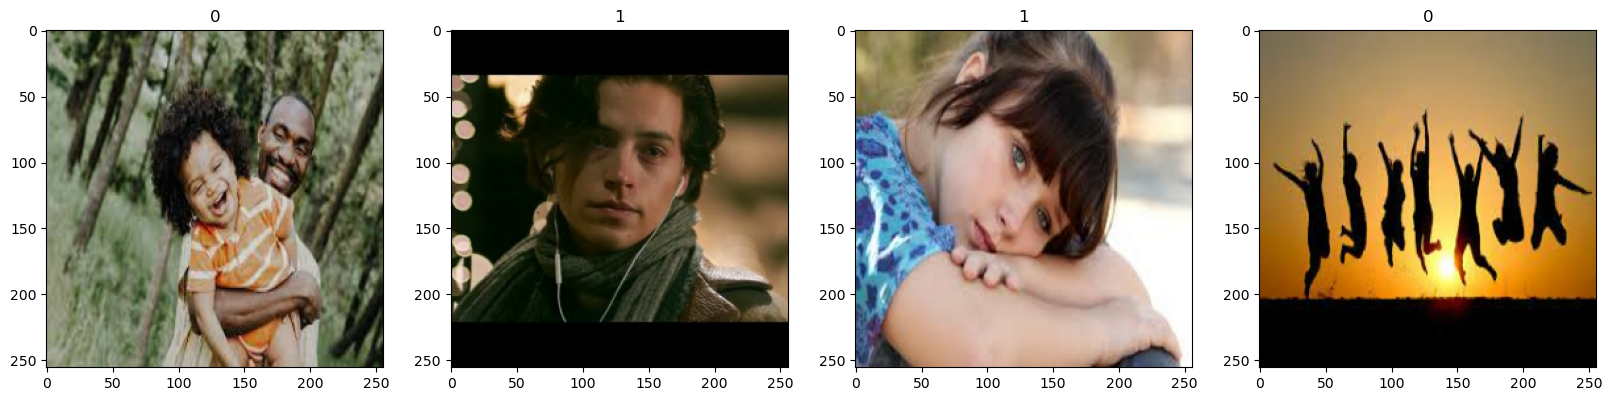

In [13]:

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [15]:

data = data.map(lambda x,y: (x/255, y))

In [17]:

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
train_size

7

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Build Deep Learning Model

In [24]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [30]:
model = Sequential()

In [41]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Train

In [52]:
logdir ='logs'

In [54]:

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [56]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 620ms/step - accuracy: 0.5164 - loss: 1.3705 - val_accuracy: 0.5156 - val_loss: 0.7485
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 399ms/step - accuracy: 0.5742 - loss: 0.6535 - val_accuracy: 0.6094 - val_loss: 0.5976
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 402ms/step - accuracy: 0.6619 - loss: 0.6400 - val_accuracy: 0.7812 - val_loss: 0.5859
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 374ms/step - accuracy: 0.7993 - loss: 0.5412 - val_accuracy: 0.7344 - val_loss: 0.4851
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 817ms/step - accuracy: 0.8013 - loss: 0.4498 - val_accuracy: 0.7969 - val_loss: 0.4105
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 437ms/step - accuracy: 0.8352 - loss: 0.3431 - val_accuracy: 0.8281 - val_loss: 0.3619
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 404ms/step - accuracy: 0.9054 - loss: 0.3129 - val_accuracy: 0.9531 - val_loss: 0.2097
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 405ms/step - accuracy: 0.9453 - loss: 0.2443 - val_accuracy: 0.9688 - val_loss

 Plot Performance

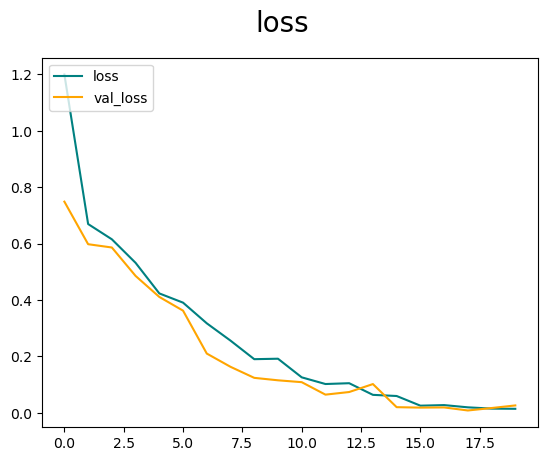

In [59]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

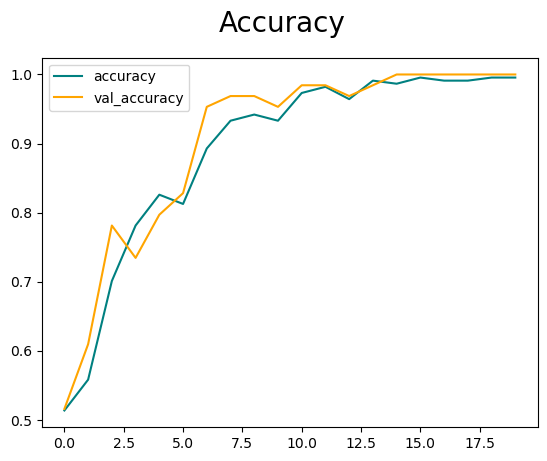

In [61]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate

In [64]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [66]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [68]:
for batch in  test.as_numpy_iterator():
    x,y = batch
    yhat =model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


In [70]:
 print(pre.result(),re.result(),acc.result())

tf.Tensor(0.9, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9411765, shape=(), dtype=float32)


Test

In [73]:
import cv2

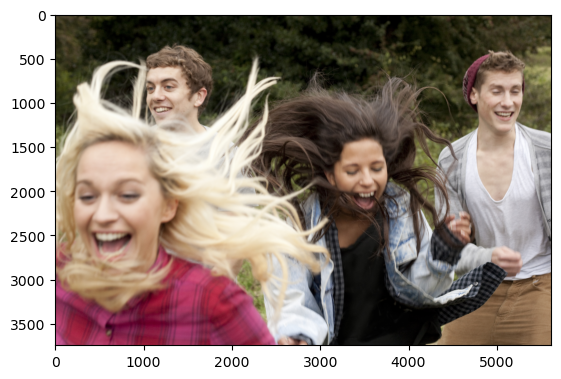

In [91]:
img = cv2.imread("154006829.jpg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()


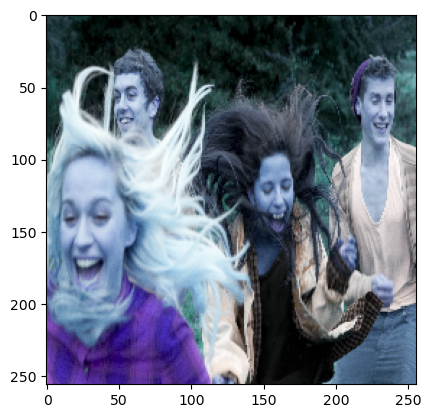

In [96]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [98]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[ 32.32617  ,  49.32617  ,  52.32617  ],
        [ 30.0625   ,  51.285156 ,  53.285156 ],
        [ 48.658203 ,  70.6582   ,  76.6582   ],
        ...,
        [ 20.164062 ,  38.033203 ,  44.753906 ],
        [ 12.8671875,  26.59375  ,  27.076172 ],
        [  1.5351562,  21.90039  ,  17.       ]],

       [[ 36.890625 ,  52.890625 ,  58.890625 ],
        [ 41.83203  ,  59.83203  ,  66.83203  ],
        [ 44.234375 ,  64.234375 ,  69.234375 ],
        ...,
        [ 20.558594 ,  38.558594 ,  45.558594 ],
        [ 26.798828 ,  39.39258  ,  42.20508  ],
        [ 21.9375   ,  37.277344 ,  34.34375  ]],

       [[ 34.501953 ,  56.501953 ,  61.970703 ],
        [ 43.57422  ,  65.75     ,  73.9375   ],
        [ 35.54492  ,  58.210938 ,  62.15039  ],
        ...,
        [ 26.642578 ,  47.98633  ,  55.29883  ],
        [ 28.90625  ,  46.79297  ,  55.34961  ],
        [ 22.626953 ,  40.814453 ,  41.876953 ]],

       ...,

     

In [100]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


In [102]:
yhat

array([[0.00695758]], dtype=float32)

In [104]:
if yhat >0.5:
    print(f' Predicted class is Sad')
else:
    print(f'Predited class is happy')

Predited class is happy


save the model 

In [107]:
from tensorflow.keras.models import load_model

In [109]:
model.save(os.path.join('models','imageclassifier.h5'))

In [123]:
new_model = load_model("models/imageclassifier.h5")

In [125]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


array([[0.00695758]], dtype=float32)